In [79]:
# Access Libraries 
import numpy as np 
import scipy as sp
import pandas as pd 
import seaborn as sb 

import matplotlib.pyplot as plt
import sklearn 

from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB

In [2]:
# Allow visualizations 
%matplotlib inline 
rcParams['figure.figsize'] = 10, 8
sb.set_style('whitegrid')

# Goal: Create prediction models for survival on Titanic

In [3]:
testData = pd.read_csv("C:\\Users\\loret\\Desktop\\DataSciencePrep\\Kaggle\\Titanic\\test.csv")
testData.head(20)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [37]:
trainData = pd.read_csv("C:\\Users\\loret\\Desktop\\DataSciencePrep\\Kaggle\\Titanic\\train.csv")
trainData.head()
trainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
testData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [5]:
testData.shape

(418, 11)

In [6]:
# Drop useless columns with a lot of nulls
# testData = testData.drop(['Cabin', 'Fare', 'Ticket', 'Name'], 1)
testData.head(50)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


### Create Function to Replace Nulls in Age

In [7]:
testData['Age'].groupby(testData['Pclass']).describe()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,98.0,40.918367,13.956799,6.00,30.0,42.0,50.75,76.0
2,88.0,28.777500,12.943458,0.92,21.0,26.5,35.25,63.0
3,146.0,24.027945,10.537105,0.17,18.5,24.0,29.75,60.5


In [8]:
# Make replacements for null values using the median
def approx_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 42
        elif Pclass == 2:
            return 26.5 
        else:
            return 24 
    else: 
        return Age 

In [9]:
# Apply function
testData['Age'] = testData[['Age', 'Pclass']].apply(approx_age, axis=1)

In [38]:
# Check to see if nulls still there 
# Note: after fixing function, nulls no longer there 
# testData['Age']

In [39]:
# Get rid of the nulls in the Age variable by applying the same function 
trainData['Age'] = trainData[['Age', 'Pclass']].apply(approx_age, axis=1)

In [42]:
trainData['Age'].isnull().any()

False

In [11]:
testData.isnull().any() # No nulls now! 

PassengerId    False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
dtype: bool

In [12]:
# double check nulls in age colum
testData['Age'].isnull().sum()

0

### Swap Categorical Variables with Dummy Indicators

In [13]:
# Change embarked and pclass from categorical to 0/1 dummy indicators
sex = pd.get_dummies(testData['Sex'], drop_first=True)
sex.head()

,male
0,1
1,0
2,1
3,1
4,0


In [43]:
# Apply for train dataset
sex = pd.get_dummies(trainData['Sex'], drop_first=True)

In [14]:
embark = pd.get_dummies(testData['Embarked'], drop_first=True)
embark.head()

,Q,S
0,1,0
1,0,1
2,1,0
3,0,1
4,0,1


In [44]:
embark = pd.get_dummies(trainData['Embarked'], drop_first=True)

In [15]:
testData.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [16]:
len(testData)

418

In [45]:
trainData.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [46]:
len(trainData)

891

### Drop & Swap

In [17]:
tDatadummy = testData.drop(['Sex','Embarked'], 1)


In [18]:
tDatadummy.head()



,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin
0,892,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,NaN
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,NaN
2,894,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,NaN
3,895,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,NaN
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,NaN


In [48]:
# Remove embarked and sex from train dataset as wel
trDatadummy = trainData.drop(['Sex', 'Embarked'], 1)

In [49]:
trDatadummy.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN


In [19]:
tData = pd.concat([tDatadummy, sex,embark], axis=1)

In [50]:
# Apply to train dataset 
trData = pd.concat([trDatadummy, sex, embark], axis=1)

In [20]:
tData.head() 

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,male,Q,S
0,892,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,NaN,1,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,NaN,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,NaN,1,1,0
3,895,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,NaN,1,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,NaN,0,0,1


In [51]:
trData.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,1,0,1


In [21]:
len(tData)

418

In [52]:
len(trData)

891

### Test for Independence 

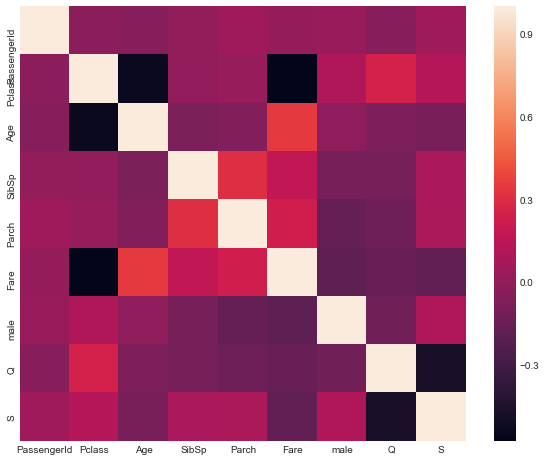

In [22]:
sb.heatmap(tData.corr())
# Age & Pclass are highly correlated, don't including in logistic regression

## Drop useless variables

In [56]:
# drop Name, Ticket, Fare, cabin, Q, S
ctData = tData.drop(['Name', 'Ticket', 'Fare', 'Cabin', 'Q', 'S'], 1)
ctData.head()

,PassengerId,Pclass,Age,SibSp,Parch,male
0,892,3,34.5,0,0,1
1,893,3,47.0,1,0,0
2,894,2,62.0,0,0,1
3,895,3,27.0,0,0,1
4,896,3,22.0,1,1,0


In [34]:
ctData.isnull().any()

PassengerId    False
Pclass         False
Age            False
SibSp          False
Parch          False
male           False
dtype: bool

In [55]:
ctrData = trData.drop(['Survived','Name', 'Ticket', 'Fare', 'Cabin', 'Q', 'S'], 1)
ctrData.head()


,PassengerId,Pclass,Age,SibSp,Parch,male
0,1,3,22.0,1,0,1
1,2,1,38.0,1,0,0
2,3,3,26.0,0,0,0
3,4,1,35.0,1,0,0
4,5,3,35.0,0,0,1


In [57]:
ctrData.isnull().any()

PassengerId    False
Pclass         False
Age            False
SibSp          False
Parch          False
male           False
dtype: bool

### Same Length

In [58]:
# Get ctrData to be the same length as ctData 
len(ctData) == len(ctrData)

False

In [64]:
len(ctData)

418

In [65]:
len(ctrData)

891

In [60]:
# First make a copy so you don't lose info 
practice = ctrData.copy(deep=True)

In [63]:
practice.head(5)
# len(practice)

,PassengerId,Pclass,Age,SibSp,Parch,male
0,1,3,22.0,1,0,1
1,2,1,38.0,1,0,0
2,3,3,26.0,0,0,0
3,4,1,35.0,1,0,0
4,5,3,35.0,0,0,1


In [69]:
chop = practice[0:418:]
chop 
len(chop)

418

In [70]:
len(ctData) == len(chop)

True

In [71]:
# Apply to real dataset 
fctrData = ctrData[0:418:]

In [73]:
# check length 
len(ctData) == len(fctrData)

True

## Prediction with Naive Bayes - GaussianNB

In [74]:
# x = test dataset; y = train
X = ctData
Y = fctrData 


In [87]:
X.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
male           418 non-null uint8
dtypes: float64(1), int64(4), uint8(1)
memory usage: 16.8 KB


In [77]:
print(X, Y)

     PassengerId  Pclass   Age  SibSp  Parch  male
0            892       3  34.5      0      0     1
1            893       3  47.0      1      0     0
2            894       2  62.0      0      0     1
3            895       3  27.0      0      0     1
4            896       3  22.0      1      1     0
5            897       3  14.0      0      0     1
6            898       3  30.0      0      0     0
7            899       2  26.0      1      1     1
8            900       3  18.0      0      0     0
9            901       3  21.0      2      0     1
10           902       3  24.0      0      0     1
11           903       1  46.0      0      0     1
12           904       1  23.0      1      0     0
13           905       2  63.0      1      0     1
14           906       1  47.0      1      0     0
15           907       2  24.0      1      0     0
16           908       2  35.0      0      0     1
17           909       3  21.0      0      0     1
18           910       3  27.0 

In [80]:
clf = GaussianNB()

In [82]:
clf.fit(X, Y)

ValueError: bad input shape (418, 6)

In [83]:
clf_pf = GaussianNB()

In [84]:
clf_pf.partial_fit(X, Y, np.unique(Y))

ValueError: bad input shape (418, 6)